In [1]:
#pip install numpy


In [2]:
import numpy as np
import os


In [3]:
#pip install tensorflow


In [4]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import load_img, ImageDataGenerator
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D ,Dense, Dropout ,Flatten

In [5]:
print(tf.__version__)

2.17.0


In [6]:
#Fetch images from folder

In [7]:
dirs = os.listdir('Waste/')
count = 0
for dir in dirs:
    files = list(os.listdir('Waste/'+dir))
    print(dir +' Folder has ' + str(len(files))+ ' images')
    count = count + len(files)
print('Folder has ' + str(count)+ ' total images')
    

glass Folder has 1994 images
metal Folder has 1196 images
paper Folder has 1050 images
plastic Folder has 1347 images
Folder has 5587 total images


In [8]:
# load images into arrays dataset

In [9]:
base_dir = 'Waste/'
img_size = 180
batch = 32

In [10]:
train_ds = tf.keras.utils.image_dataset_from_directory(base_dir,
                                                       seed = 123, 
                                                       validation_split = 0.2,
                                                       subset ='training',
                                                       batch_size = batch,
                                                       image_size =(img_size ,img_size))

val_ds = tf.keras.utils.image_dataset_from_directory(base_dir,
                                                       seed = 123, 
                                                       validation_split = 0.2,
                                                       subset = 'validation',
                                                       batch_size = batch,
                                                       image_size =(img_size ,img_size))
                                                                                                              
                                                       

Found 5587 files belonging to 4 classes.
Using 4470 files for training.
Found 5587 files belonging to 4 classes.
Using 1117 files for validation.


In [11]:
waste_names = train_ds.class_names
waste_names

['glass', 'metal', 'paper', 'plastic']

In [12]:
#pip install matplotlib

In [13]:
import matplotlib.pyplot as plt

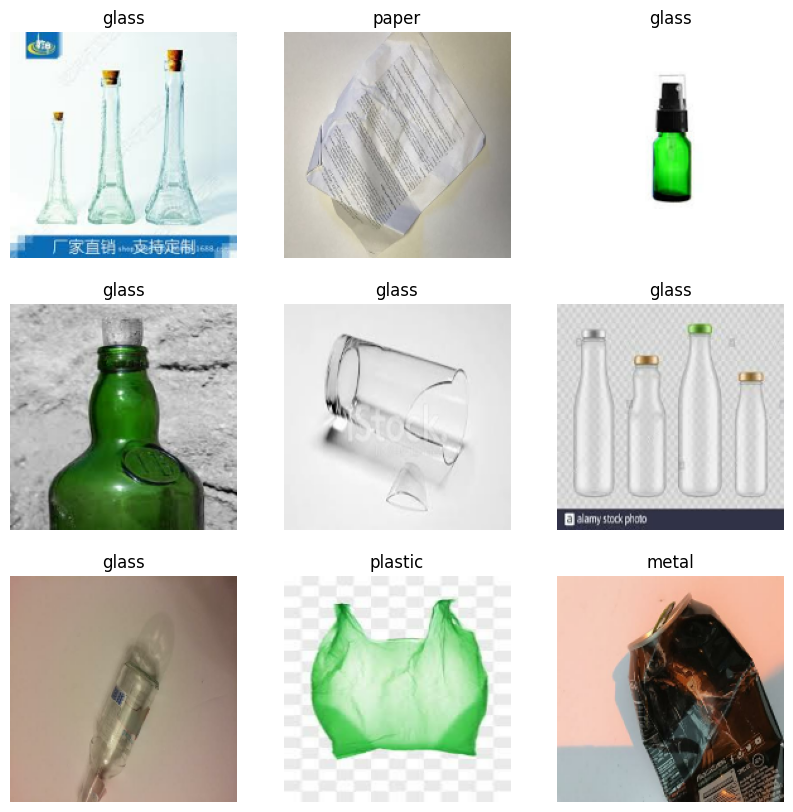

In [14]:
i = 0
plt.figure(figsize =(10,10))

for images ,labels in train_ds.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(waste_names[labels[i]])
        plt.axis('off')
        
        

In [15]:
AUTOTUNE = tf.data.AUTOTUNE

In [16]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = AUTOTUNE)

In [17]:
val_ds = val_ds.cache().prefetch(buffer_size = AUTOTUNE)

In [18]:
#Data Augmentation

In [19]:
data_augmentation = Sequential([
    layers.Input(shape=(img_size, img_size, 3)),  # Define the input shape explicitly
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1)
])

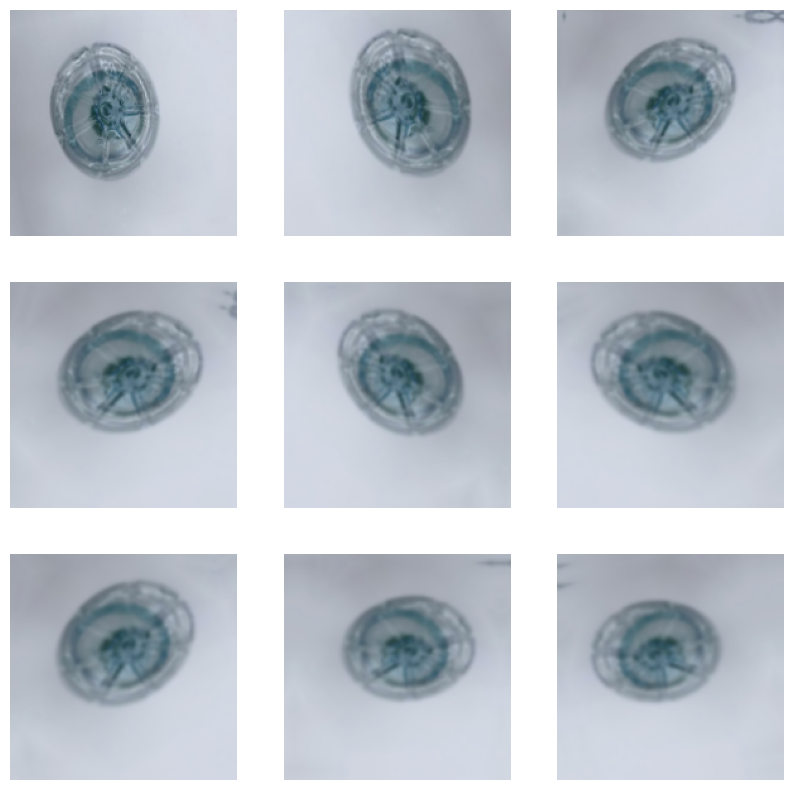

In [20]:
i = 0
plt.figure(figsize=(10, 10))

for images, labels in train_ds.take(1):
    for i in range(9):
        # Apply augmentation to a single image by expanding dimensions
        images = data_augmentation(images)  
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[0].numpy().astype("uint8"))  # Remove batch dimension for display
        plt.axis("off")
        

In [21]:
# model creation

In [22]:
model = Sequential([
    data_augmentation,
    layers.Rescaling(1./255),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(), 
    
    layers.Conv2D(32, 3, padding='same', activation='relu'), 
    layers.MaxPooling2D(), 
    
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    
    # Fully connected layers
    layers.Flatten(),
    layers.Dropout(0.4),
    layers.Dense(128, activation='relu'),
    layers.Dense(4)  # Output layer (4 classes)
])
   

In [23]:
model.compile(optimizer= 'adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [24]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential (Sequential)              │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling (Rescaling)                │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 180, 180, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 90, 90, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 90, 90, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 45, 45, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 45, 45, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 22, 22, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 30976)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 30976)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       3,965,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,989,156 (15.22 MB)

 Trainable params: 3,989,156 (15.22 MB)

 Non-trainable params: 0 (0.00 B)

In [25]:
epochs_size = 25
history = model.fit(train_ds, epochs=epochs_size, validation_data=val_ds)

Epoch 1/25
140/140 ━━━━━━━━━━━━━━━━━━━━ 50s 343ms/step - accuracy: 0.3529 - loss: 1.4624 - val_accuracy: 0.5040 - val_loss: 1.0918
Epoch 2/25
140/140 ━━━━━━━━━━━━━━━━━━━━ 44s 318ms/step - accuracy: 0.5537 - loss: 1.0180 - val_accuracy: 0.5542 - val_loss: 1.0903
Epoch 3/25
140/140 ━━━━━━━━━━━━━━━━━━━━ 49s 349ms/step - accuracy: 0.6122 - loss: 0.8905 - val_accuracy: 0.6464 - val_loss: 0.8595
Epoch 4/25
140/140 ━━━━━━━━━━━━━━━━━━━━ 44s 311ms/step - accuracy: 0.6602 - loss: 0.8483 - val_accuracy: 0.6222 - val_loss: 0.9013
Epoch 5/25
140/140 ━━━━━━━━━━━━━━━━━━━━ 44s 311ms/step - accuracy: 0.6614 - loss: 0.8058 - val_accuracy: 0.6258 - val_loss: 0.9169
Epoch 6/25
140/140 ━━━━━━━━━━━━━━━━━━━━ 44s 315ms/step - accuracy: 0.6976 - loss: 0.7447 - val_accuracy: 0.6831 - val_loss: 0.7833
Epoch 7/25
140/140 ━━━━━━━━━━━━━━━━━━━━ 44s 314ms/step - accuracy: 0.7256 - loss: 0.6963 - val_accuracy: 0.7028 - val_loss: 0.7581
Epoch 8/25
140/140 ━━━━━━━━━━━━━━━━━━━━ 44s 316ms/step - accuracy: 0.7523 - loss: 0

In [26]:
#Graph 

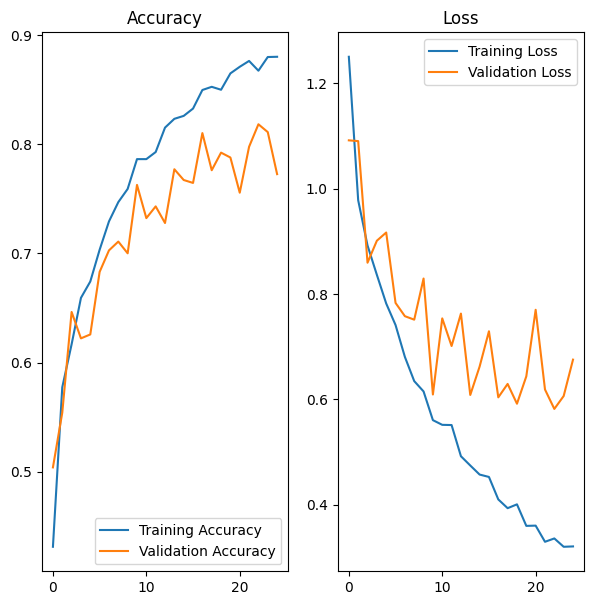

In [27]:

epochs_range = range(epochs_size)

# Plot Accuracy
plt.figure(figsize=(7, 7))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, history.history['accuracy'], label='Training Accuracy')
plt.plot(epochs_range, history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.legend()

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, history.history['loss'], label='Training Loss')
plt.plot(epochs_range, history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.legend()

plt.show()


In [28]:
from PIL import Image
import numpy as np
def classify_images(image_path):
    
    # Load the image with PIL
    
    input_image = Image.open(image_path).resize((img_size, img_size))

    # Convert the image to a numpy array
    input_image_array = np.array(input_image)

    # Add batch dimension
    input_image_exp_dim = np.expand_dims(input_image_array, axis=0)

    # Make prediction
    predictions = model.predict(input_image_exp_dim)
    result = tf.nn.softmax(predictions[0])
    outcome = 'The images belongs to ' + waste_names[np.argmax(result)] + ' with a score of ' + str(np.max(result)*100)
    return outcome



In [29]:
classify_images('test/pl_box.jpeg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


'The images belongs to plastic with a score of 72.62888550758362'

In [30]:
classify_images('test/glass4.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


'The images belongs to glass with a score of 91.98579788208008'

In [31]:
classify_images('test/metal4.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


'The images belongs to metal with a score of 94.67126727104187'

In [32]:
classify_images('test/paper2.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


'The images belongs to paper with a score of 98.64267706871033'

In [33]:
model.save('waste_class.h5')